<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/PCA_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

In [ ]:
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving 0041-83493_Rev07_PCA.csv to 0041-83493_Rev07_PCA (2).csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['0041-83493_Rev07_PCA.csv']))

In [ ]:
dataset

,SH1_C2_Diameter -14.020,SH1_B5_Diameter -0.220,SH1_B5_Diameter -0.160,SH1_B5_Position -0.005,SH1_B1_Width -0.190,SH1_B1_Distance -0.200,SH1_B1_Position- 0.002,SH1_D5_Position -0.005,SH2_D7_Width -0.190,SH2_D7_Distance -0.20,...,SH3_B8_Position -0.005,SH3_B7_Distance -0.100,SH4_C7_Radius -0.0325,SH4_D8_Distance -0.470,SH4_D8_Distance -0.235,SH4_B7_Distance -0.148,SH4_C7_Distance -0.118,SH2_B8_Angle -5 Deg,SH2_C7_Distance -6.000_R,Defect Category
0,14.017400,0.222300,0.161250,0.000700,0.192200,0.198800,0.000000,0.001100,0.192200,0.198900,...,0.001200,0.098950,0.033800,0.473750,0.236300,0.147450,0.117250,5.040300,6.000200,1
1,14.016011,0.221733,0.161174,0.000481,0.191812,0.200574,0.000000,0.001154,0.191750,0.200828,...,0.002455,0.102773,0.033507,0.470759,0.234603,0.147419,0.117412,5.056671,6.000013,1
2,14.015942,0.221904,0.161202,0.000903,0.191788,0.200091,0.000000,0.001015,0.191730,0.200023,...,0.001692,0.102942,0.033518,0.470711,0.234614,0.147386,0.117469,5.050116,5.999963,0
3,14.018477,0.221841,0.161174,0.000434,0.191770,0.200465,0.000000,0.001113,0.191971,0.200458,...,0.002165,0.102567,0.033509,0.470742,0.234636,0.147522,0.117474,5.050046,6.000079,0
4,14.016071,0.221928,0.161158,0.000481,0.191820,0.200294,0.000000,0.000876,0.191710,0.200486,...,0.001043,0.102188,0.033508,0.470712,0.234519,0.147350,0.117411,5.045632,5.999966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,14.015503,0.221326,0.160738,0.000396,0.191336,0.200956,0.000008,0.001500,0.191257,0.200373,...,0.000313,0.098899,0.033551,0.472191,0.236373,0.148387,0.118398,5.046470,5.998720,1
88,14.015220,0.221238,0.160695,0.001317,0.191349,0.200278,0.000000,0.001034,0.191284,0.199542,...,0.001097,0.098601,0.033503,0.472068,0.236322,0.148331,0.118553,5.044330,6.000287,0
89,14.015178,0.221296,0.160680,0.000526,0.191342,0.200183,0.000000,0.000821,0.191169,0.199202,...,0.000545,0.098496,0.033497,0.471922,0.236317,0.148301,0.118640,5.044763,6.000126,0
90,14.017048,0.221358,0.160751,0.000183,0.191340,0.200260,0.000000,0.000817,0.191211,0.199622,...,0.000742,0.098684,0.033505,0.471981,0.236307,0.148213,0.118508,5.046067,6.000382,0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print (X)

[[14.0174    0.2223    0.16125  ...  0.11725   5.0403    6.0002  ]
 [14.016011  0.221733  0.161174 ...  0.117412  5.056671  6.000013]
 [14.015942  0.221904  0.161202 ...  0.117469  5.050116  5.999963]
 ...
 [14.015178  0.221296  0.16068  ...  0.11864   5.044763  6.000126]
 [14.017048  0.221358  0.160751 ...  0.118508  5.046067  6.000382]
 [14.017311  0.221343  0.160738 ...  0.118686  5.04622   6.000193]]


In [ ]:
print(y)

[1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0]


In [ ]:
dataset.shape

(92, 129)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Columns: 129 entries, SH1_C2_Diameter -14.020 to Defect Category
dtypes: float64(127), int64(2)
memory usage: 92.8 KB


# Taking care of missing data

Impute Missing Values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, :])
X[:,:] = imputer.transform(X[:,:])

In [ ]:
print(X)

[[14.0174    0.2223    0.16125  ...  0.11725   5.0403    6.0002  ]
 [14.016011  0.221733  0.161174 ...  0.117412  5.056671  6.000013]
 [14.015942  0.221904  0.161202 ...  0.117469  5.050116  5.999963]
 ...
 [14.015178  0.221296  0.16068  ...  0.11864   5.044763  6.000126]
 [14.017048  0.221358  0.160751 ...  0.118508  5.046067  6.000382]
 [14.017311  0.221343  0.160738 ...  0.118686  5.04622   6.000193]]


Check the percentage of missing values in each variable

In [ ]:
dataset.isnull().sum()/len(dataset)*100

SH1_C2_Diameter -14.020     0.0
SH1_B5_Diameter -0.220      0.0
SH1_B5_Diameter -0.160      0.0
SH1_B5_Position -0.005      0.0
SH1_B1_Width -0.190         0.0
                           ... 
SH4_B7_Distance -0.148      0.0
SH4_C7_Distance -0.118      0.0
SH2_B8_Angle -5 Deg         0.0
SH2_C7_Distance -6.000_R    0.0
Defect Category             0.0
Length: 129, dtype: float64

# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

[[14.016131  0.221921  0.161137 ...  0.118853  5.047034  5.998962]
 [14.017064  0.221908  0.161109 ...  0.118768  5.043036  5.999925]
 [14.017253  0.221852  0.161101 ...  0.118778  5.044763  5.999592]
 ...
 [14.018551  0.221899  0.161109 ...  0.118556  5.048042  5.99866 ]
 [14.017349  0.221907  0.161126 ...  0.118737  5.048334  5.999183]
 [14.016486  0.221923  0.161095 ...  0.118546  5.042147  5.999608]]


In [ ]:
print(X_test)

[[14.015942  0.221904  0.161202 ...  0.117469  5.050116  5.999963]
 [14.018163  0.221931  0.161114 ...  0.118749  5.045751  6.0001  ]
 [14.017335  0.221925  0.161174 ...  0.117905  5.05236   5.999522]
 ...
 [14.017333  0.221834  0.161152 ...  0.118228  5.046564  5.99958 ]
 [14.015503  0.221326  0.160738 ...  0.118398  5.04647   5.99872 ]
 [14.016388  0.221883  0.161112 ...  0.118509  5.044066  5.999569]]


In [ ]:
print(y_train)

[0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0]


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.98837968  0.63078404  0.60626135 ...  0.948894    0.20690044
  -1.03467322]
 [ 0.25678895  0.58059     0.44613754 ...  0.74935871 -0.61120986
   1.14189308]
 [ 0.50902568  0.36436955  0.40038787 ...  0.77283345 -0.25781404
   0.38924866]
 ...
 [ 2.24131815  0.54584029  0.44613754 ...  0.25169423  0.41316737
  -1.71725164]
 [ 0.63714592  0.57672892  0.54335557 ...  0.67658702  0.4729193
  -0.53517046]
 [-0.51460169  0.6385062   0.36607563 ...  0.22821949 -0.79312583
   0.42541175]]


In [ ]:
print(X_test)

[[-1.24061641  0.56514568  0.97797735 ... -2.30000997  0.83756976
   1.22778043]
 [ 1.72349883  0.66939483  0.47473107 ...  0.70475671 -0.05563971
   1.53742693]
 [ 0.61846172  0.64622836  0.81785353 ... -1.27651132  1.29675923
   0.23103512]
 ...
 [ 0.61579255  0.29487012  0.69204196 ... -0.51827723  0.11072439
   0.36212634]
 [-1.82649961 -1.66655829 -1.675503   ... -0.11920666  0.09148918
  -1.58164003]
 [-0.6453911   0.48406301  0.46329366 ...  0.14136295 -0.40044107
   0.33726421]]


# Applying PCA

In [ ]:
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
ex_variance=np.var(X_train,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

array([0.52599394, 0.26200476, 0.2120013 ])

In [ ]:
Xax = X_train[:,0]
Yax = X_train[:,1]
Zax = X_train[:,2]

In [ ]:
cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

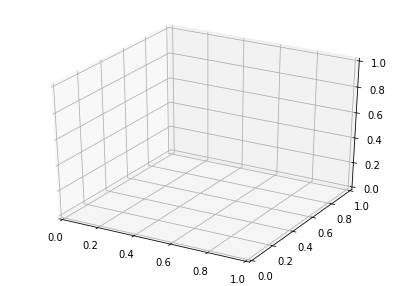

In [ ]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

In [ ]:
fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

IndexError: ignored